# Zero Inflated Poisson with BART

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
from vi_evi import vi_evi

In [2]:
az.style.use("arviz-white")

In [3]:
fish_data = pd.read_csv("fish.csv")
Y = fish_data["count"]
X = fish_data.drop(columns=["count", "nofish"])

In [4]:
fish_data.head()

,nofish,livebait,camper,persons,child,count
0,1,0,0,1,0,0
1,0,1,1,1,0,0
2,0,1,0,1,0,0
3,0,1,1,2,1,0
4,0,1,0,1,0,1


In [5]:
with pm.Model() as ZIP_reg:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X, np.log(Y + 1))
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 201 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


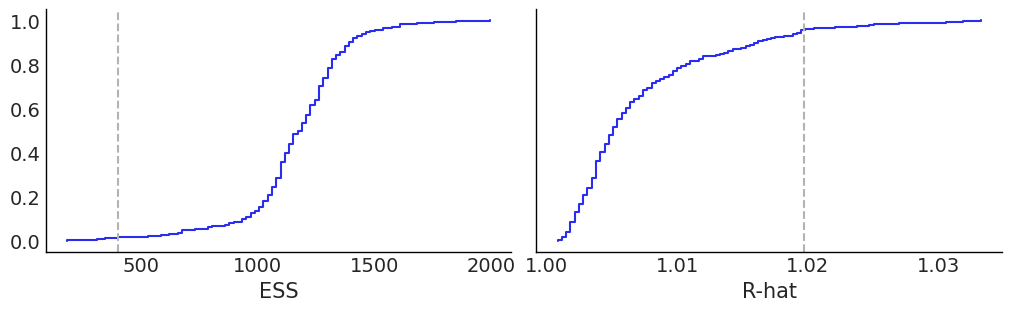

In [6]:
pmb.plot_convergence(idata_ZIP_reg, var_name="θ");

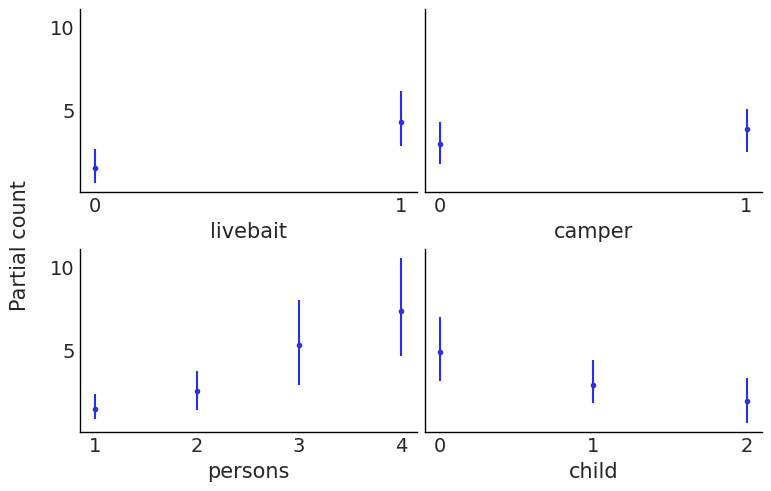

In [7]:
pmb.plot_pdp(θ, X=X, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

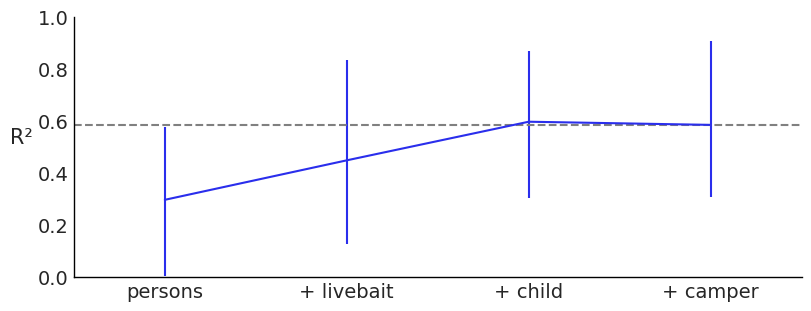

In [8]:
pmb.plot_variable_importance(idata_ZIP_reg, θ, X);

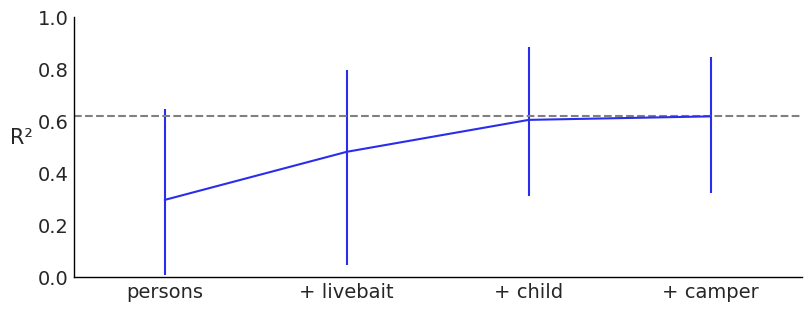

In [9]:
pmb.plot_variable_importance(idata_ZIP_reg, θ, X, method="backward");

In [10]:
# Clean memory
del (ZIP_reg, idata_ZIP_reg, ψ, θ, yl)

### With 200 trees  

In [11]:
with pm.Model() as ZIP_reg_200:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X, np.log(Y + 1), m=200)
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg_200 = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 760 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


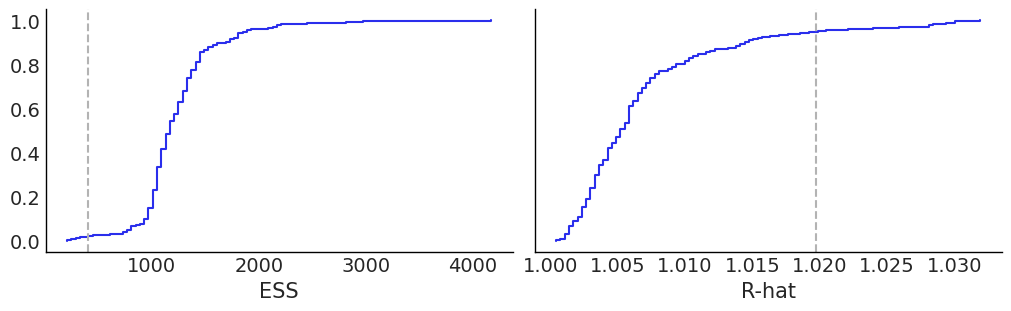

In [12]:
pmb.plot_convergence(idata_ZIP_reg_200, var_name="θ");

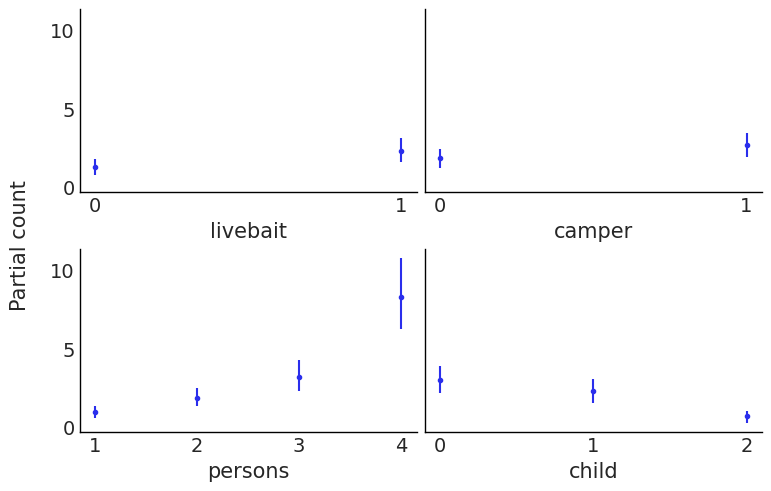

In [13]:
pmb.plot_pdp(θ, X=X, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

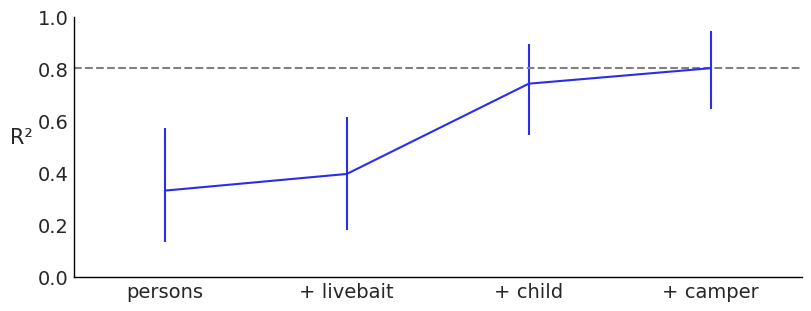

In [14]:
pmb.plot_variable_importance(idata_ZIP_reg_200, θ, X);

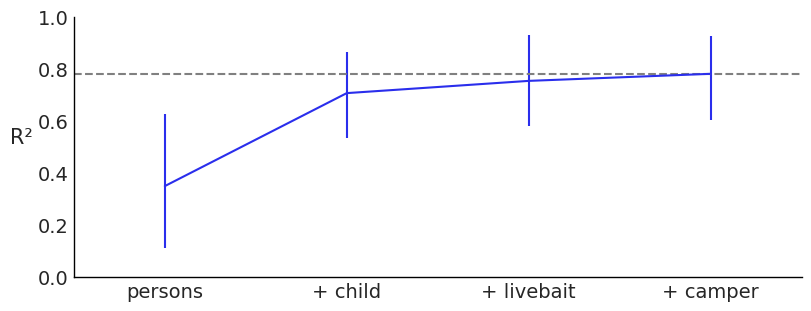

In [15]:
pmb.plot_variable_importance(idata_ZIP_reg_200, θ, X, method="backward");

In [16]:
# Clean memory
del (ZIP_reg_200, idata_ZIP_reg_200, ψ, θ, yl)

## Reorder variables

In [17]:
fish_data["adults"] = fish_data["persons"] - fish_data["child"]

In [18]:
fish_data.head()

,nofish,livebait,camper,persons,child,count,adults
0,1,0,0,1,0,0,1
1,0,1,1,1,0,0,1
2,0,1,0,1,0,0,1
3,0,1,1,2,1,0,1
4,0,1,0,1,0,1,1


In [19]:
X2 = fish_data.drop(columns=["count", "nofish", "persons"])

In [20]:
with pm.Model() as ZIP_reg2:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X2, np.log(Y + 1))
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg2 = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 199 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


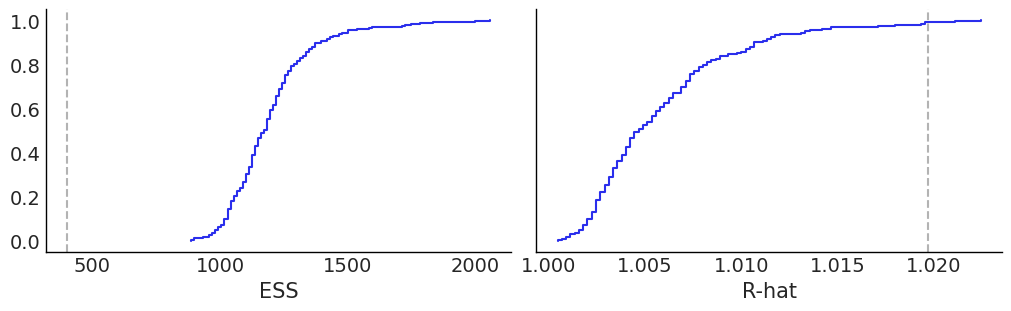

In [21]:
pmb.plot_convergence(idata_ZIP_reg2, var_name="θ");

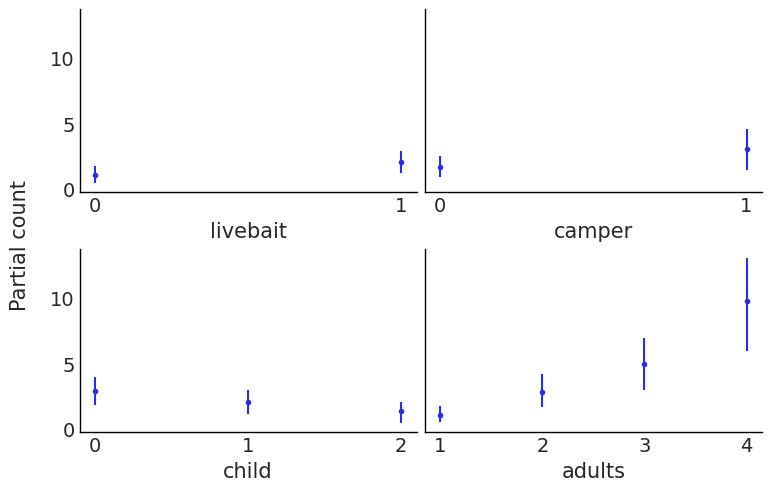

In [22]:
pmb.plot_pdp(θ, X=X2, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

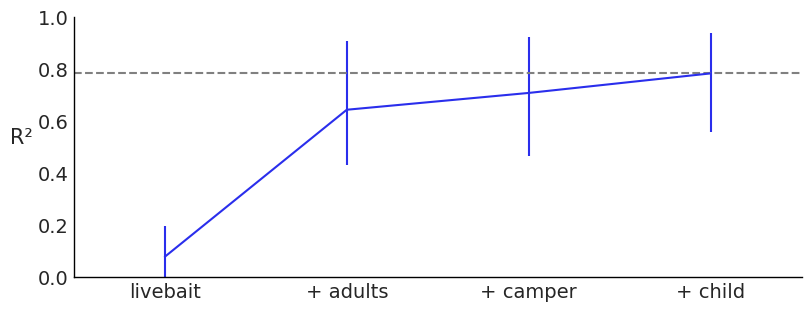

In [23]:
pmb.plot_variable_importance(idata_ZIP_reg2, θ, X2);

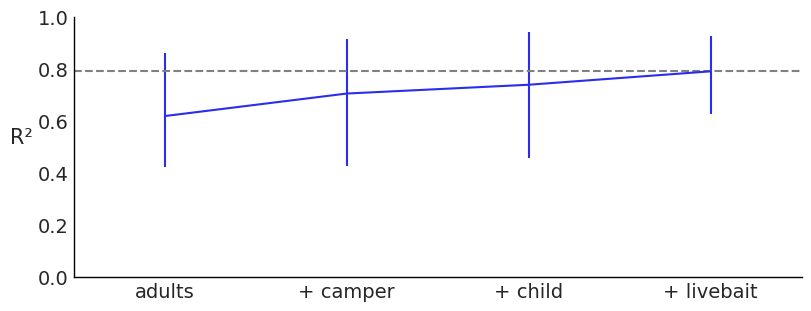

In [24]:
pmb.plot_variable_importance(idata_ZIP_reg2, θ, X2, method="backward");

In [25]:
# Clean memory
del (ZIP_reg2, idata_ZIP_reg2, ψ, θ, yl)

### With 200 trees

In [26]:
with pm.Model() as ZIP_reg2_200:
    ψ = pm.Beta("ψ", 1, 1)
    θ = pmb.BART("θ", X2, np.log(Y + 1), m=200)
    yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
    idata_ZIP_reg2_200 = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 773 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


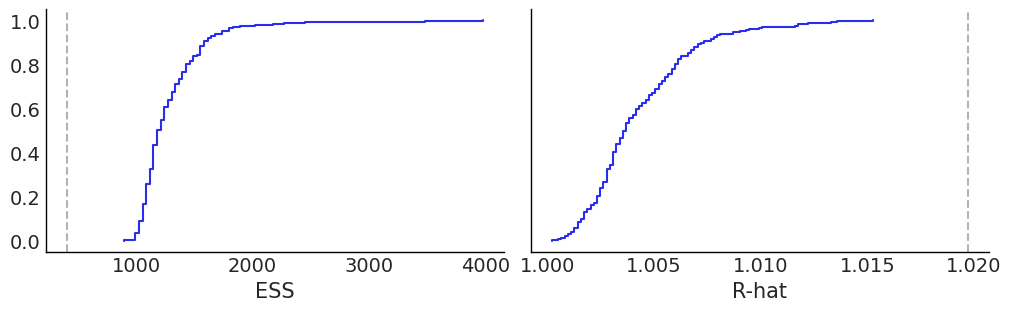

In [28]:
pmb.plot_convergence(idata_ZIP_reg2_200, var_name="θ");

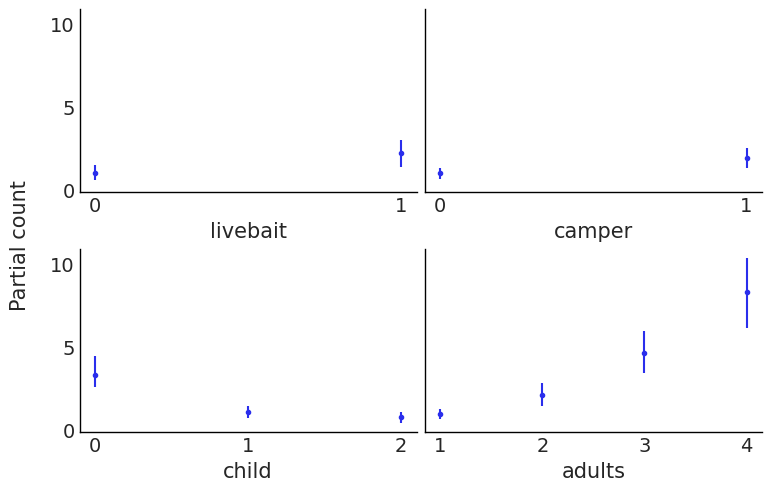

In [29]:
pmb.plot_pdp(θ, X=X2, Y=Y, grid=(2, 2), func=np.exp, var_discrete=range(4));

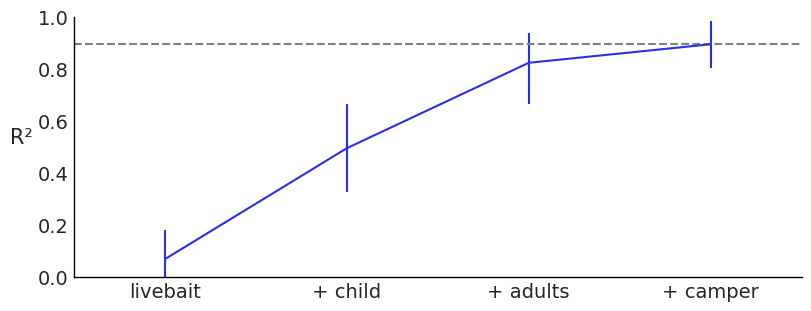

In [30]:
indices_vi_m200, _ = pmb.plot_variable_importance(idata_ZIP_reg2_200, θ, X2);

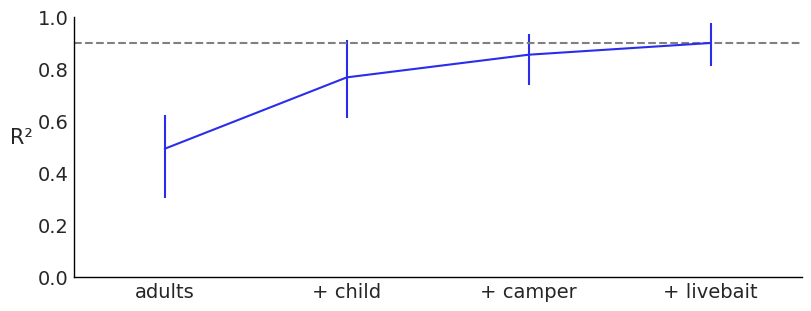

In [31]:
indices_bw_m200, _ = pmb.plot_variable_importance(
    idata_ZIP_reg2_200, θ, X2, method="backward"
);

## Explicit Calculation of R$^{2}$  
### Only with `m=200` and using the reorder variables (`X2`)  
**VI order**  

In [32]:
idatas = []
bart_rvs = []

for idx in range(X2.shape[1]):
    with pm.Model() as model:
        ψ = pm.Beta("ψ", 1, 1)
        θ = pmb.BART("θ", X2.iloc[:, indices_vi_m200[: idx + 1]], np.log(Y + 1), m=200)
        yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
        idata = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)
        idatas.append(idata)
        bart_rvs.append(θ)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 759 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 757 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 755 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 762 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


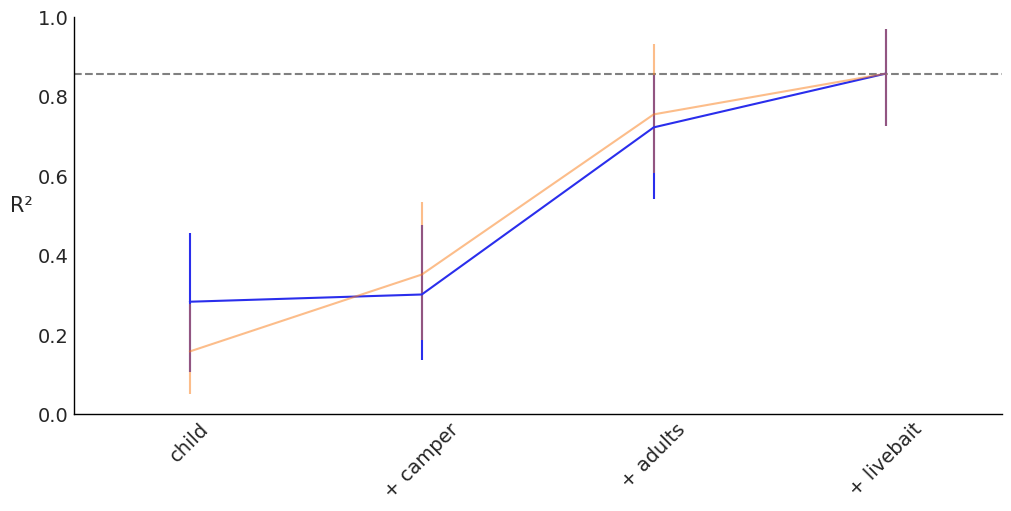

In [39]:
vi_evi(bart_rvs, idatas, X2, indices_vi_m200, "VI", 100, 123, figsize=(10, 5))
plt.savefig("ZIP_m200_vi.png");

In [40]:
# clean memory
del idatas
del bart_rvs

**Backward order**

In [41]:
idatas = []
bart_rvs = []

for idx in range(X2.shape[1]):
    with pm.Model() as model:
        ψ = pm.Beta("ψ", 1, 1)
        θ = pmb.BART("θ", X2.iloc[:, indices_bw_m200[: idx + 1]], np.log(Y + 1), m=200)
        yl = pm.ZeroInflatedPoisson("yl", ψ, np.exp(θ), observed=Y)
        idata = pm.sample(draws=2000, tune=2000, chains=4, random_seed=123)
        idatas.append(idata)
        bart_rvs.append(θ)

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 765 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 752 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 760 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [ψ]
>PGBART: [θ]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 761 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


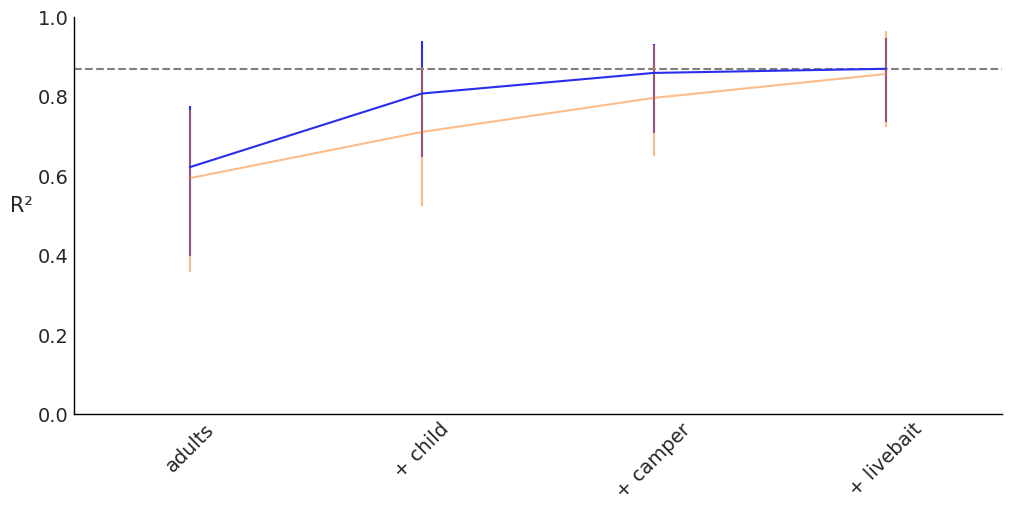

In [42]:
vi_evi(bart_rvs, idatas, X2, indices_bw_m200, "backward", 100, 123, figsize=(10, 5))
plt.savefig("ZIP_m200_bw.png");